This function is written to plot the scaling law of the PDE and compare it with the scaling the we get from the ML model. This function can also we used to plot the other long term behaviour of the ML model.

To do list for today:
1- Plotting rthe scaling for earthquakes first.

In [1]:
# loading the data 
from Forward2d import forwardmodel
import cte_eq
import pickle
import numpy as np
import sys
sys.path.append('./..')
import ProcessFunctions
import matplotlib.pyplot as plt
import cte
from scipy import integrate

In [2]:
T_final=10500
mu=3e10
drs=0.012
Nxout=cte_eq.Nxout
Ntout=cte_eq.Ntout
direct='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/2DSim_MainSimulation_Tf'+str(T_final)+"Nx="+str(Nxout)+"Nt="+str(Ntout)+'drs'+str(drs)+".npz"
data=np.load(direct)
v=data['v']
# theta=data['theta']
# tau=data['tau']
# slip=data['slip']
t=data['t']
a=data['a']


In [6]:
L=240e3
Nx=int(a.shape[0]/Nxout)
delta_x=L/Nx
v=np.array(v)
# theta=np.array(theta)
t=np.array(t)
Nt=t.shape[0]//Nx
t=t.reshape((Nt,Nx)) 
v=v.reshape((Nt,Nx))

In [7]:
Nx


1024

In [9]:
# pdot is the the integral of v over space
pdot=np.sum(v,axis=1)*delta_x

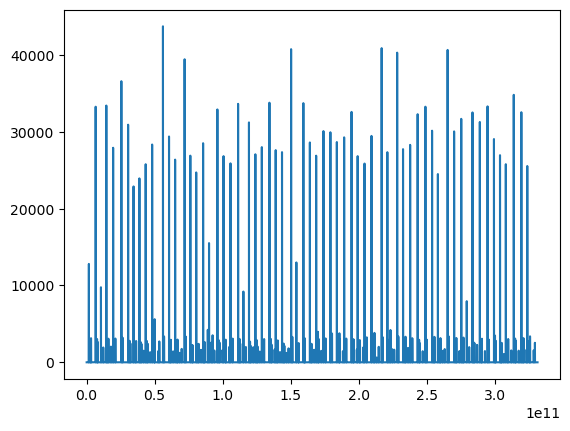

In [23]:
plt.plot(t[:,0],pdot)

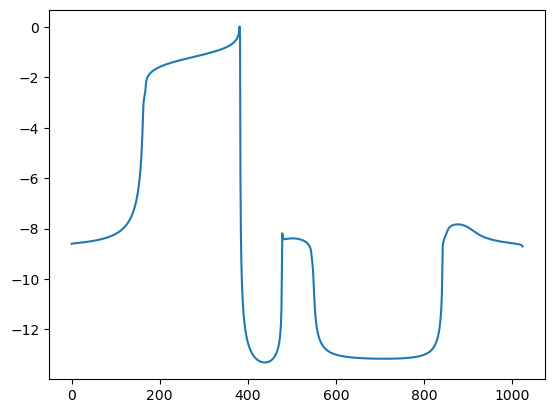

In [22]:
plt.plot(np.log10(v[2000,:]))

In [63]:
# finding the mements, durations, and are for each event
flag_event=False
V_event=1e-2
T1s=[] # this is the time of the start of events
T2s=[] # this is the time of the end of events
length_ruptures=[] # this is the length of the rupture
pots=[] # integral of pdot over the event duration
for i in range(1,20000):
    if np.max(v[i,:])>V_event and flag_event==False:
        start=i
        T1s.append(t[i,0])
        flag_event=True
    if np.max(v[i,:])<V_event and flag_event==True:
        end=i
        flag_event=False
        T2s.append(t[i,0])
        # check from start to end for all elements of v[start,:] to v[end,:] which elements had v >v_event in one line, from this you can find the event extent
        ruptured=np.where(v[start:end,:]>V_event,1,0)
        # find the locations at which at least there is one element that is ruptured
        ruptured=np.sum(ruptured,axis=0)
        ruptured=(ruptured>0)
        # summing number of ruptured elements
        num_ruptured_elements=np.sum(ruptured)
        # then the rupture length of this event is given by 
        length_rupture=num_ruptured_elements*delta_x
        length_ruptures.append(length_rupture)
        potency_of_event=integrate.cumtrapz(pdot[start-1:end],t[start-1:end,0])    
        pots.append(potency_of_event[-1])
# now I have everything to plot the scaling law for the earthquake problem

In [71]:
T1s=np.array(T1s)
T2s=np.array(T2s)
length_ruptures=np.array(length_ruptures)
pots=np.array(pots)
if np.size(T2s)==np.size(T1s)-1:
    T1s=T1s[:-1]

In [72]:
print(T1s.shape)

(29,)


In [73]:
mu=3e10


In [74]:
moment_events=mu*pots

In [75]:
print("T1s",np.array(T1s)/cte.t_yr)
print("T2s",np.array(T2s)/cte.t_yr)
print("length_rupture",length_ruptures)

T1s [ 51.16036972  52.07450441  52.07451608  52.07451855  94.80989572
 102.11959096 209.97543995 209.97594139 242.49642854 259.08184812
 333.1238499  333.12456752 333.12670968 333.12675471 333.12675548
 334.51076928 387.42208021 458.29689941 485.29777901 506.61110288
 566.85413414 616.78554622 616.78651773 668.39710096 668.56496824
 808.29922866 808.29928719 838.74371773 838.8746896 ]
T2s [ 51.16037314  52.07450888  52.07451789  52.07451953  94.80989709
 102.11959263 209.97544453 209.97594526 242.49643001 259.08184976
 333.12385206 333.12457201 333.12671403 333.12675534 333.12675563
 334.51077071 387.4220815  458.29690584 485.29778063 506.61110441
 566.85413578 616.7855511  616.78652406 668.39710264 668.56496987
 808.29923292 808.29929048 838.74371923 838.87469097]
length_rupture [ 77578.125  85781.25   21328.125   2578.125  14531.25   18046.875
  81796.875 163125.     16406.25   17578.125  14062.5    80156.25
  26250.       703.125    234.375  10312.5    11718.75  163593.75
  20859.37

In [76]:
print(T1s.shape)


(29,)


In [77]:
print(T2s.shape)

(29,)


In [100]:
log_10_moment_events=np.log10(moment_events)

In [107]:
def Gut(Mw,NpointsM=30):
    CumNumber=np.array([])
    c1=np.min(Mw)
    c2=np.max(Mw)-.0001 # To remove log10(0) error
    print(c1)
    print(c2)
    c=np.linspace(c1,c2,NpointsM)
    print(c)
    for i in range(c.size):
        CumNumber=np.append(CumNumber,(sum(j > c[i] for j in Mw)))
    return c,CumNumber   

In [108]:
mags,cumN=Gut(log_10_moment_events)

12.249530223910805
16.642875971400084
[12.24953022 12.4010249  12.55251959 12.70401427 12.85550895 13.00700363
 13.15849831 13.30999299 13.46148767 13.61298235 13.76447703 13.91597171
 14.0674664  14.21896108 14.37045576 14.52195044 14.67344512 14.8249398
 14.97643448 15.12792916 15.27942384 15.43091852 15.5824132  15.73390789
 15.88540257 16.03689725 16.18839193 16.33988661 16.49138129 16.64287597]


In [109]:
cumN

array([28., 28., 28., 28., 28., 27., 27., 27., 27., 27., 26., 26., 26.,
       26., 26., 25., 24., 18., 12., 10., 10., 10., 10., 10., 10.,  6.,
        4.,  4.,  1.,  1.])

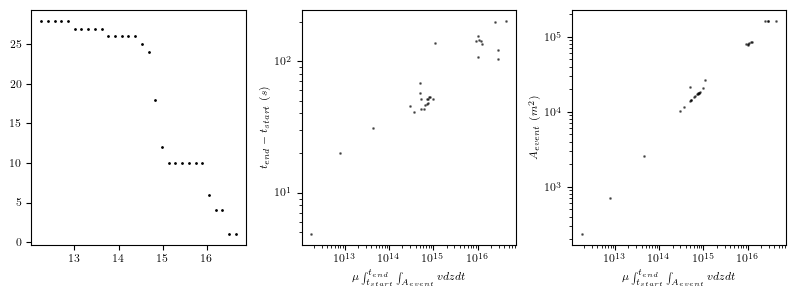

In [110]:
# make a figure with
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': True,  # If you want to use LaTeX for rendering text
})
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

plt.rcParams.update({'font.family': 'serif', 'font.serif': 'Times New Roman','font.size': 8})

axs[0].scatter(mags, cumN, s=1, color='black')
# plotting in loglog scale the length of events in y axis and moment in x axis

axs[1].scatter(moment_events, T2s-T1s , s=1, color='black',alpha=0.5)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r"$\mu \int_{t_{start}}^{t_{end}} \int_{A_{event}} v dz dt$")
axs[1].set_ylabel(r"$t_{end}-t_{start}$ $(s)$")


axs[2].scatter(moment_events, length_ruptures , s=1, color='black',alpha=0.5)
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel(r"$\mu \int_{t_{start}}^{t_{end}} \int_{A_{event}} v dz dt$")
axs[2].set_ylabel(r"$A_{event}$ ($m^2$)")
plt.tight_layout()

In [47]:
moment_events.shape

(127,)

In [51]:
np.array(length_ruptures).shape

(17,)

In [62]:
logvmax_reducedmodels=np.zeros((N_it+1,3))
times=np.zeros((N_it+1,3))
# Finding the three dimensional velocities matrix from the ROM
# make a figure with two subplots:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': True,  # If you want to use LaTeX for rendering text
})
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

plt.rcParams.update({'font.family': 'serif', 'font.serif': 'Times New Roman','font.size': 8})

size=U_v.shape[0]
size_x=256
size_y=32
V_ox_ROMs=[]
t_ox_ROMs=[]
for i in range(1):
    # organize the input
    X_input_partial=X_MLs[i] # xinput without the vmax
    # finding vmax
    for j in range(N_it+1):
        logvmax_reducedmodels[j,i]=find_logvmax(X_input_partial[j,:list_Nv[i]],phi[:,:list_Nv[i]])    
    X_ML_scaled=X_input_partial[:,:list_Nv[i]]/max_X_dt
    X_ML_scaled = np.concatenate((X_ML_scaled, logvmax_reducedmodels[:,i].reshape(N_it+1,1)), axis=1)
    # load model:
    modeldt=Forwardmapdt(list_Nv[i])
    modeldt.load_state_dict( torch.load("/central/groups/astuart/hkaveh/Data/LearnROM/ROMdt_POD_separate_onV_theta"+str(version)+"N_m_v"+str(list_Nv[i])+".pt"))
    modeldt.eval()
    X_ML_scaled_tensor = torch.tensor(X_ML_scaled, dtype=torch.float32)
    X_ML_scaled_tensor.to(device)
    dt_ML=modeldt(X_ML_scaled_tensor)
    dt_ML_detach=dt_ML.detach().numpy()
    dt_ML_detach_scaled=dt_ML_detach*max_Y_dt
    dt_ML_realtime=10**dt_ML_detach_scaled
    time_ML=np.cumsum(dt_ML_realtime)
    times[:,i]=time_ML
    # plt.plot(dt_ML.detach().numpy(),label='Predicted')  
    time_ML=time_ML.reshape(-1,1,1) # adding three dimension to time_ML
    # 
    U_ROM=U_v[:,0:list_Nv[i]]
    
    V_ox_ROM=np.empty((N_it+1,size_y,size_x))
    t_ox_ROM=np.ones((N_it+1,size_y,size_x))
    #appending vmax
    vmax=[]
    for j in range(N_it+1):
        V_snapshot = U_ROM @ (forecasts[i][:list_Nv[i], j] * max_X_list[i]) + q_bar_v.reshape(size,)
        V_snapshot = V_snapshot[:size_x * size_y].reshape(size_y, size_x)
        vmax.append(np.max(V_snapshot))
        V_ox_ROM[j,:,:]=10**(V_snapshot)
        t_ox_ROM[j,:,:]=time_ML[j]*np.ones((size_y,size_x))
    V_ox_ROMs.append(V_ox_ROM)
    t_ox_ROMs.append(t_ox_ROM)
    TimeStarts_ML,TimeEnds_ML,rectangles_ML,Mags_ML=Find_T_X_tau_without_p_input(V_ox_ROM,t_ox_ROM,V_thresh,L_thresh,t_yr,x_ox,z_ox,L_fault,mu)
    axs[1].plot(10**(1.5*(Mags_ML+6)),TimeEnds_ML-TimeStarts_ML,'o',label='ROM',alpha=0.2)
    Nrectangles_ML=int(rectangles_ML.size/4)
    rectangles_ML=np.reshape(rectangles_ML,(Nrectangles_ML,4))
    Areas_ML=W*(rectangles_ML[:,3])*1000
    axs[2].plot(10**(1.5*(Mags_ML+6)),Areas_ML,'o',label='ROM',alpha=0.2)

# total time is 
print(t_ox_ROM[-1,0,0]/t_yr)
print(t_ox_ROM[0,0,0]/t_yr)
# total time is 
tot_time_ROM=(t_ox_ROM[-1,0,0]-t_ox_ROM[0,0,0])/t_yr
Mags,Numbs=Gut(Mags_ML,120) # 120 is the number of discretization points. 
Rate=Numbs/tot_time_ROM


axs[0].set_yscale("log")
axs[0].plot(Mags , Rate,'.',color='blue',label='ROM',marker='+') 
axs[0].plot(Mags_PDE , Rate_PDE,'.',color='black',label='PDE')
axs[0].set_xlabel(r'$M$')
axs[0].set_xlim(left=6,right=7.5)
axs[0].set_ylabel(r'$N_{\geq M}$(per year)')  
axs[0].legend(loc='upper right')
axs[0].set_aspect('equal', adjustable='box')

axs[1].plot(10**(1.5*(Mws_v2+6)),T2s_v2-T1s_v2,'o',label='PDE',color='black',alpha=0.005)  
axs[2].plot(10**(1.5*(Mws_v2+6)),Areas,'o',label='PDE',color='black',alpha=0.005)

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend(loc='upper left')
#axs[0].set_title('Moment Duration Scaling Law')
axs[1].set_xlabel(r"$\mu \int_{t_{start}}^{t_{end}} \int_{A_{event}} v dz dt$")
axs[1].set_ylabel(r"$t_{end}-t_{start}$ $(s)$")

axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend(loc='upper left')
#axs[1].set_title('Moment Area Scaling Law')
axs[2].set_xlabel(r"$\mu \int_{t_{start}}^{t_{end}} \int_{A_{event}} v dz dt$")
axs[2].set_ylabel(r"$A_{event}$ ($m^2$)")
# plot a line with slope 1/3 in log log scale
x = np.linspace(10**(16),10**18,100)
y = 10**(1/3*np.log10(x*1e5)) 
y2= 10**(2/3*np.log10(x*1e-3))
axs[1].plot(x,y,color='black')
axs[2].plot(x,y2,color='black')

# adding text on the plot
axs[1].text(10**17,10**7,'$T \propto M^{1/3}$',rotation=20)
axs[2].text(10**17,10**9,'$A \propto M^{2/3}$',rotation=20)

for ax in axs[1:]:

    leg = ax.legend(loc='upper left')
    # Set legend handle alpha to 1 for each legend
    for lh in leg.legendHandles:
        lh.set_alpha(1)
plt.tight_layout()
#saving the figure in the central group directory
fig.savefig("/central/groups/astuart/hkaveh/Figs/ROM/scaling_lawsN=40"+".pdf", bbox_inches='tight')

 

ValueError: operands could not be broadcast together with shapes (17,) (18,) 